# Olympics Database
## PART 2 - Exploratory analysis<br>PART 2 - Analyse exploratoire
#### ENG<br>Start with importing the libraries needed<br>And then upload the data

#### FR<br>Commençons par importer les librairies que nous allons utiliser<br>Puis téléchargeons la base de données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
url = 'https://raw.githubusercontent.com/SportsScience-with-RL/Olympics/main/summer_arranged.csv'
df_main = pd.read_csv(url, index_col=0)

df_main

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31158,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31159,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31160,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31161,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [3]:
np.sort(df_main.Country.unique())

array(['AFG', 'AHO', 'ALG', 'ANZ', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE',
       'BAH', 'BAR', 'BDI', 'BEL', 'BER', 'BLR', 'BOH', 'BOT', 'BRA',
       'BRN', 'BUL', 'BWI', 'CAN', 'CHI', 'CHN', 'CIV', 'CMR', 'COL',
       'CRC', 'CRO', 'CUB', 'CYP', 'CZE', 'DEN', 'DJI', 'DOM', 'ECU',
       'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'EUA', 'EUN', 'FIN', 'FRA',
       'FRG', 'GAB', 'GBR', 'GDR', 'GEO', 'GER', 'GHA', 'GRE', 'GRN',
       'GUA', 'GUY', 'HAI', 'HKG', 'HUN', 'INA', 'IND', 'IOP', 'IRI',
       'IRL', 'IRQ', 'ISL', 'ISR', 'ISV', 'ITA', 'JAM', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KOR', 'KSA', 'KUW', 'LAT', 'LIB', 'LTU', 'LUX',
       'MAR', 'MAS', 'MDA', 'MEX', 'MGL', 'MKD', 'MNE', 'MOZ', 'MRI',
       'NAM', 'NED', 'NGR', 'NIG', 'NOR', 'NZL', 'PAK', 'PAN', 'PAR',
       'PER', 'PHI', 'POL', 'POR', 'PRK', 'PUR', 'QAT', 'ROU', 'RSA',
       'RU1', 'RUS', 'SCG', 'SEN', 'SGP', 'SIN', 'SLO', 'SRB', 'SRI',
       'SUD', 'SUI', 'SUR', 'SVK', 'SWE', 'SYR', 'TAN', 'TCH', 'TGA',
       'THA', 'TJK',

In [4]:
#Let's change URS and RU1 for RUS
#Changeons URS et RU1 pour RUS
df_main.loc[df_main['Country']=='RU1', 'Country'] = 'RUS'
df_main.loc[df_main['Country']=='URS', 'Country'] = 'RUS'

#### ENG<br>Explore the data

#### FR<br>Explorons les données

<AxesSubplot:xlabel='Year', ylabel='Count'>

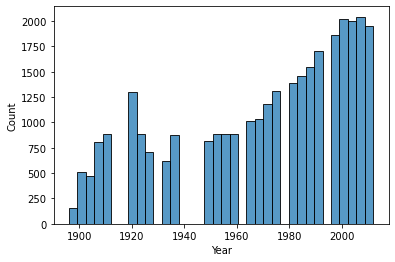

In [5]:
#Start with histogram plot
#Commençons par des histogrammes
sns.histplot(df_main['Year'])

<AxesSubplot:xlabel='Count', ylabel='Country'>

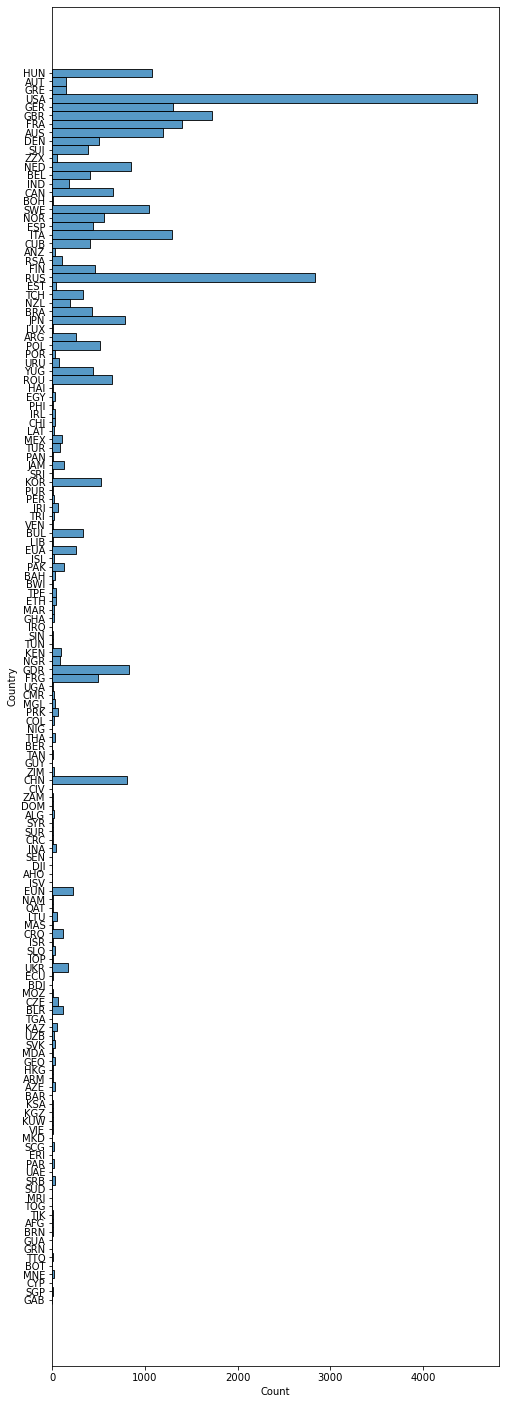

In [6]:
plt.figure(figsize=(8,25))
sns.histplot(data=df_main, y='Country')

In [7]:
#We can adjust the EDA by dropping countries with few medals
#As we see on the 'country' histplot there is a lot of countries to drop
#Nous pouvons affiner l'exploration en écartant les pays sous représentés en termes de médailles
#Comme nous pouvons le voir sur l'histogramme 'country', il y a beaucoup de pays sous représentés

In [8]:
ctrs_gb = df_main.groupby('Country').count().sort_values(by='Medal', ascending=False)
#Keep top 10 countries
#Gardons les 10 meilleurs pays
top10 = ctrs_gb.head(10).index
top10

Index(['USA', 'RUS', 'GBR', 'FRA', 'GER', 'ITA', 'AUS', 'HUN', 'SWE', 'NED'], dtype='object', name='Country')

In [9]:
df_top10 = df_main[df_main.Country.isin(top10)].copy().reset_index(drop=True)

In [10]:
df_top10

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
2,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze
3,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze
4,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
17295,2012,London,Wrestling,Wrestling Freestyle,"GUENOT, Steeve",FRA,Men,Wg 66 KG,Bronze
17296,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
17297,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold
17298,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver


In [11]:
#Now let's explore the top 10 over different features
#A présent explorons ce top 10 avec plusieurs variables
df_top10['Medal_count'] = df_top10.groupby('Country')['Medal'].transform('count')
df_top10 = df_top10.join(pd.get_dummies(df_top10['Medal'], prefix='Medal'))

In [12]:
df_top10['Medal_Bronze'] = df_top10.groupby('Country')['Medal_Bronze'].transform('sum').astype('int')
df_top10['Medal_Silver'] = df_top10.groupby('Country')['Medal_Silver'].transform('sum').astype('int')
df_top10['Medal_Gold'] = df_top10.groupby('Country')['Medal_Gold'].transform('sum').astype('int')
df_top10

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Medal_count,Medal_Bronze,Medal_Gold,Medal_Silver
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,1079,351,412,316
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,1079,351,412,316
2,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,4585,1098,2235,1252
3,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,1079,351,412,316
4,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,4585,1098,2235,1252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17295,2012,London,Wrestling,Wrestling Freestyle,"GUENOT, Steeve",FRA,Men,Wg 66 KG,Bronze,1396,497,408,491
17296,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold,2835,884,1078,873
17297,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold,2835,884,1078,873
17298,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,2835,884,1078,873


Text(0.5, 1.0, 'Top 10 Countries by Medals')

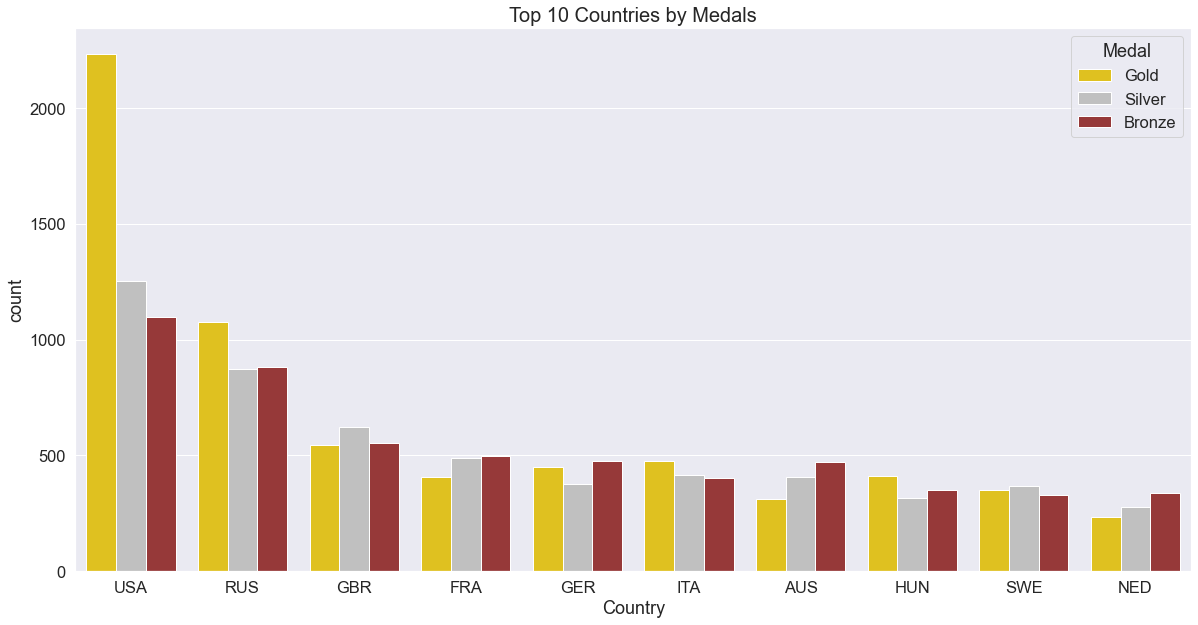

In [13]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(x='Country', data=df_top10, hue='Medal', order=top10, hue_order=['Gold', 'Silver', 'Bronze'],
              palette = ['gold', 'silver', 'brown'])
plt.title("Top 10 Countries by Medals", fontsize = 20)

Text(0.5, 1.0, 'Top 10 Countries by Gender')

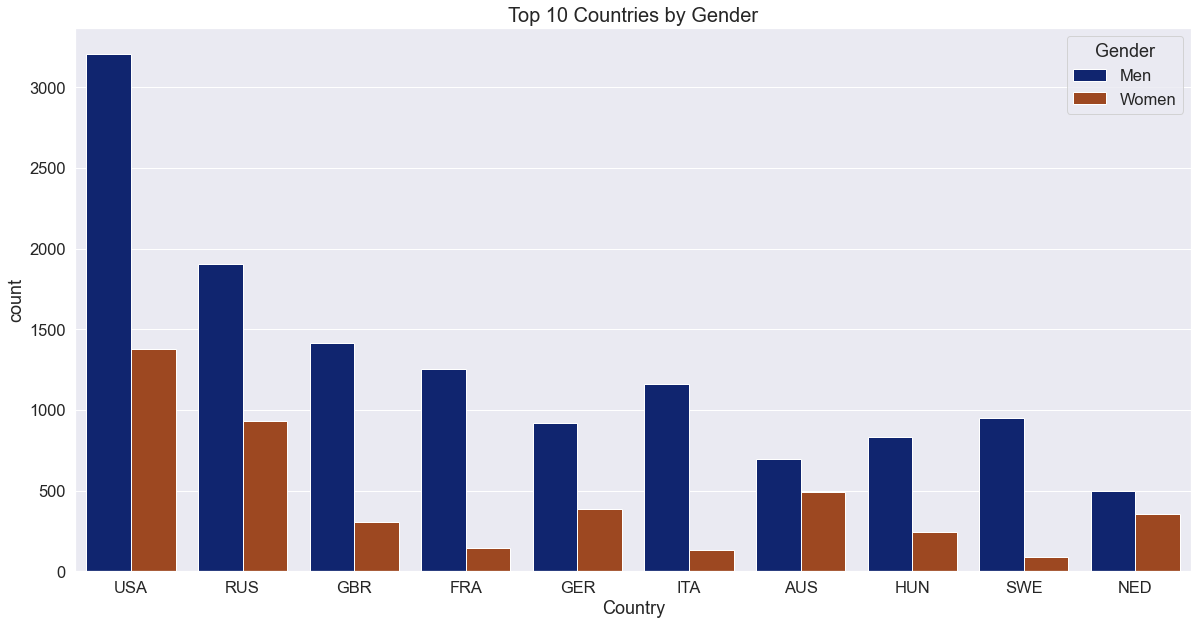

In [14]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(x='Country', data=df_top10, hue='Gender', order=top10)
plt.title("Top 10 Countries by Gender", fontsize = 20)

Text(0.5, 0.98, 'Top 10 Countries by Gender by Medals')

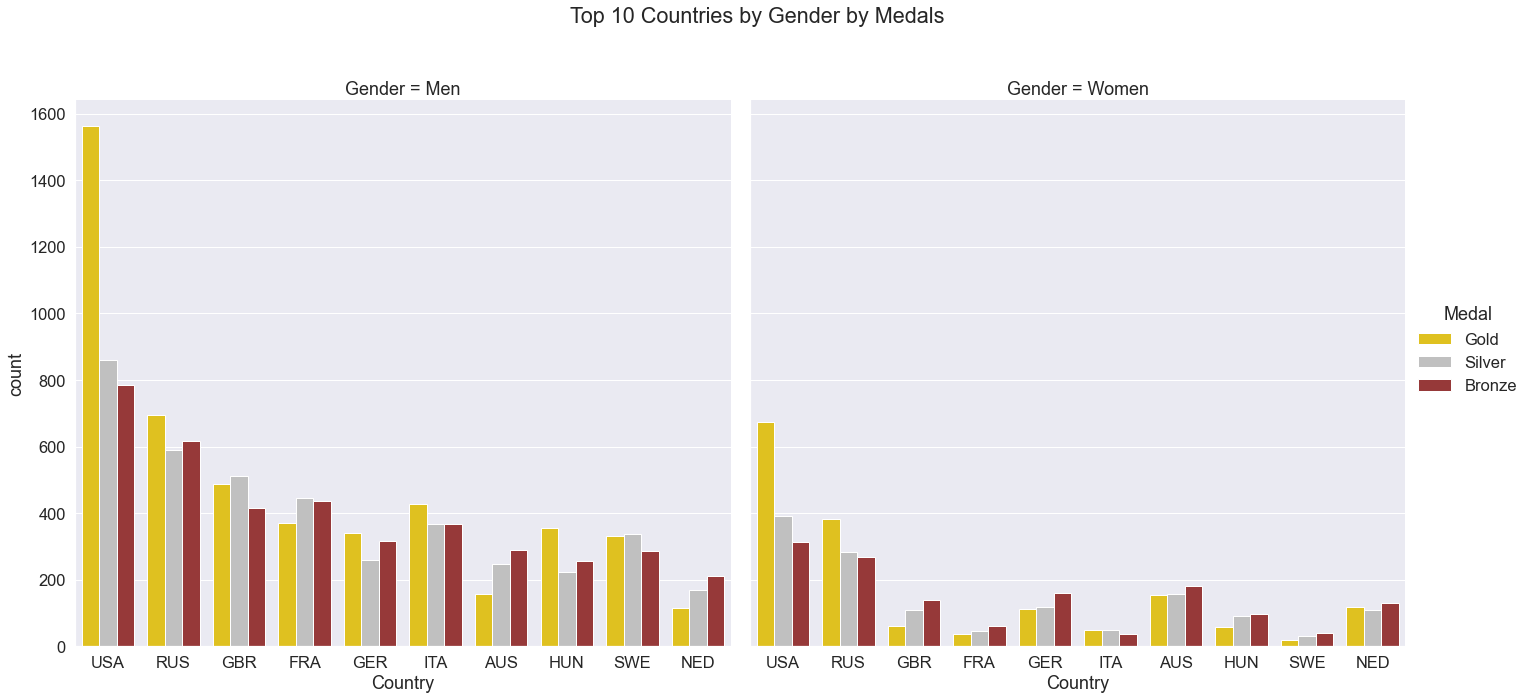

In [15]:
sns.set(font_scale=1.5, palette= "dark")
sns.catplot(data=df_top10, x='Country', hue='Medal', order=top10, hue_order=['Gold', 'Silver', 'Bronze'],
            palette = ['gold', 'silver', 'brown'], kind='count', col='Gender', height=10)
plt.subplots_adjust(top=0.85)
plt.suptitle('Top 10 Countries by Gender by Medals')

In [16]:
#Let's see the variation of Medals over the Olympics
#Voyons la variation de médailles gagnées entre chaque Olympiade

In [17]:
#Also due to historics events we have some messy data so we will explore data from 1980
#Dû aux évènements historiques nous avons quelques données 'disproportionnées' donc exploreron seulement depuis 1980

In [18]:
df_top10_80s = df_top10[df_top10['Year']>=1980].copy()

In [19]:
df_top10_80s.drop(columns=['Medal_count', 'Medal_Bronze', 'Medal_Gold', 'Medal_Silver'], inplace=True)

df_top10_80s = df_top10_80s.join(pd.get_dummies(df_top10_80s['Medal'], prefix='Medal'))
df_top10_80s['Medal_Bronze'] = df_top10_80s.groupby('Country')['Medal_Bronze'].transform('sum').astype('int')
df_top10_80s['Medal_Silver'] = df_top10_80s.groupby('Country')['Medal_Silver'].transform('sum').astype('int')
df_top10_80s['Medal_Gold'] = df_top10_80s.groupby('Country')['Medal_Gold'].transform('sum').astype('int')

df_top10_80s['Medal_count'] = df_top10_80s.groupby('Country')['Medal'].transform('count')
df_top10_80s['Medal_count_year'] = df_top10_80s.groupby(['Country', 'Year'])['Medal'].transform('count')
df_top10_80s['Medal_count_medal'] = df_top10_80s.groupby(['Country', 'Year', 'Medal'])['Medal'].transform('count')
df_top10_80s['Medal_count_gender'] = df_top10_80s.groupby(['Country', 'Year', 'Gender'])['Medal'].transform('count')

In [20]:
year = df_top10_80s.groupby(['Country', 'Year'], as_index=False)['Medal'].count()
year['Var_year'] = np.round(year.groupby('Country', as_index=False)['Medal'].diff() / 
                            year.groupby('Country', as_index=False)['Medal'].shift(), 2)*100
year.drop(columns='Medal', inplace=True)

year_gold = df_top10_80s[df_top10_80s['Medal']=='Gold'].groupby(['Country', 'Year'], as_index=False)['Medal'].count()
year_gold['Var_gold'] = np.round(year_gold.groupby('Country', as_index=False)['Medal'].diff() / 
                                 year_gold.groupby('Country', as_index=False)['Medal'].shift(), 2)*100
year_gold.drop(columns='Medal', inplace=True)

year_men = df_top10_80s[df_top10_80s['Gender']=='Men'].groupby(['Country', 'Year'], as_index=False)['Medal'].count()
year_men['Var_men'] = np.round(year_men.groupby('Country', as_index=False)['Medal'].diff() / 
                               year_men.groupby('Country', as_index=False)['Medal'].shift(), 2)*100
year_men.drop(columns='Medal', inplace=True)

year_women = df_top10_80s[df_top10_80s['Gender']=='Women'].groupby(['Country', 'Year'], as_index=False)['Medal'].count()
year_women['Var_women'] = np.round(year_women.groupby('Country', as_index=False)['Medal'].diff() / 
                                 year_women.groupby('Country', as_index=False)['Medal'].shift(), 2)*100
year_women.drop(columns='Medal', inplace=True)

year_medals = df_top10_80s.groupby(['Country', 'Medal', 'Year']).agg({'Sport':'count'})
year_medals['Var_medals'] = np.round(year_medals.groupby(['Country', 'Medal'], as_index=False)['Sport'].diff() / 
                                     year_medals.groupby(['Country', 'Medal'], as_index=False)['Sport'].shift(), 2)*100
year_medals.drop(columns='Sport', inplace=True)

year_gender = df_top10_80s.groupby(['Country', 'Gender', 'Year']).agg({'Medal':'count'})
year_gender['Var_gender'] = np.round(year_gender.groupby(['Country', 'Gender'], as_index=False)['Medal'].diff() / 
                                     year_gender.groupby(['Country', 'Gender'], as_index=False)['Medal'].shift(), 2)*100
year_gender.drop(columns='Medal', inplace=True)

In [21]:
df_top10_80s = df_top10_80s.merge(year, how='left', left_on=['Country', 'Year'], 
                                  right_on=['Country', 'Year'])

df_top10_80s = df_top10_80s.merge(year_gold, how='left', left_on=['Country', 'Year'], 
                                  right_on=['Country', 'Year'])

df_top10_80s = df_top10_80s.merge(year_men, how='left', left_on=['Country', 'Year'], 
                                  right_on=['Country', 'Year'])

df_top10_80s = df_top10_80s.merge(year_women, how='left', left_on=['Country', 'Year'], 
                                  right_on=['Country', 'Year'])

df_top10_80s = df_top10_80s.merge(year_medals, how='left', left_on=['Country', 'Medal', 'Year'], 
                                  right_on=['Country', 'Medal', 'Year'])

df_top10_80s = df_top10_80s.merge(year_gender, how='left', left_on=['Country', 'Gender', 'Year'], 
                                  right_on=['Country', 'Gender', 'Year'])

In [22]:
df_top10_80s.fillna(0, inplace=True)

In [23]:
df_top10_80s

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Medal_Bronze,...,Medal_count,Medal_count_year,Medal_count_medal,Medal_count_gender,Var_year,Var_gold,Var_men,Var_women,Var_medals,Var_gender
0,1980,Moscow,Aquatics,Diving,"AMBARTSUMYAN, David",RUS,Men,10M Platform,Bronze,509,...,1505,442,123,307,0.0,0.0,0.0,0.0,0.0,0.0
1,1980,Moscow,Aquatics,Diving,"ALEINIK, Vladimir",RUS,Men,10M Platform,Silver,509,...,1505,442,127,307,0.0,0.0,0.0,0.0,0.0,0.0
2,1980,Moscow,Aquatics,Diving,"TSOTADZE, Liana",RUS,Women,10M Platform,Bronze,509,...,1505,442,123,135,0.0,0.0,0.0,0.0,0.0,0.0
3,1980,Moscow,Aquatics,Diving,"EMIRZIAN, Servard",RUS,Women,10M Platform,Silver,509,...,1505,442,127,135,0.0,0.0,0.0,0.0,0.0,0.0
4,1980,Moscow,Aquatics,Diving,"CAGNOTTO, Giorgio Franco",ITA,Men,3M Springboard,Bronze,204,...,523,37,8,34,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7882,2012,London,Wrestling,Wrestling Freestyle,"GUENOT, Steeve",FRA,Men,Wg 66 KG,Bronze,199,...,511,82,22,51,8.0,20.0,-23.0,210.0,-21.0,-23.0
7883,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold,509,...,1505,131,47,65,-8.0,9.0,3.0,-18.0,9.0,3.0
7884,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold,509,...,1505,131,47,65,-8.0,9.0,3.0,-18.0,9.0,3.0
7885,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver,509,...,1505,131,33,65,-8.0,9.0,3.0,-18.0,-25.0,3.0


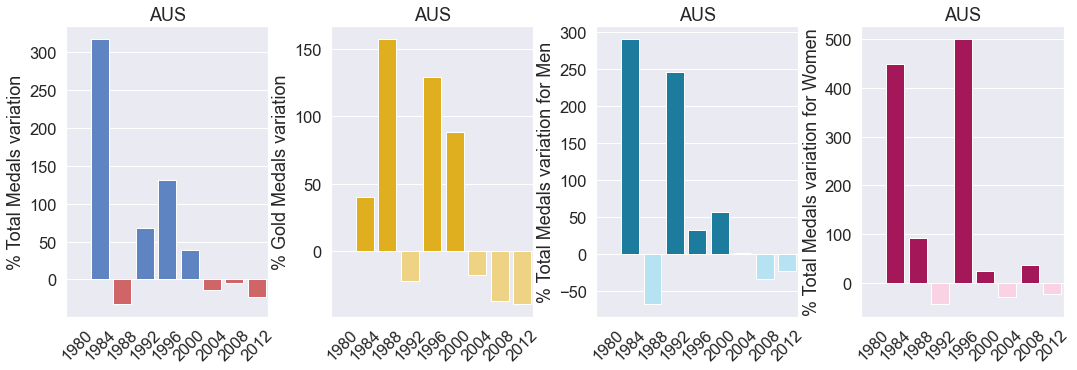

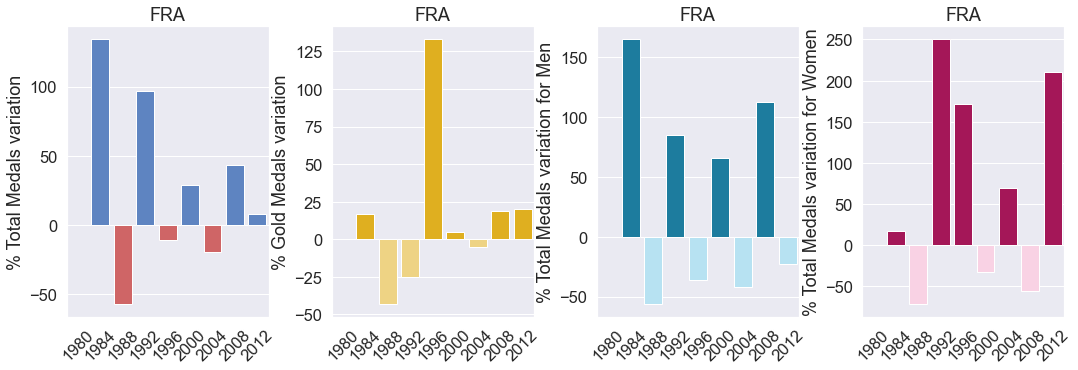

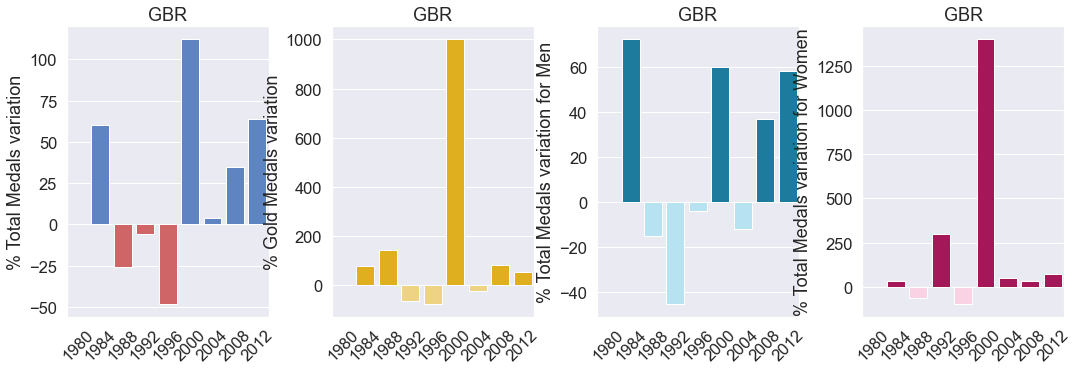

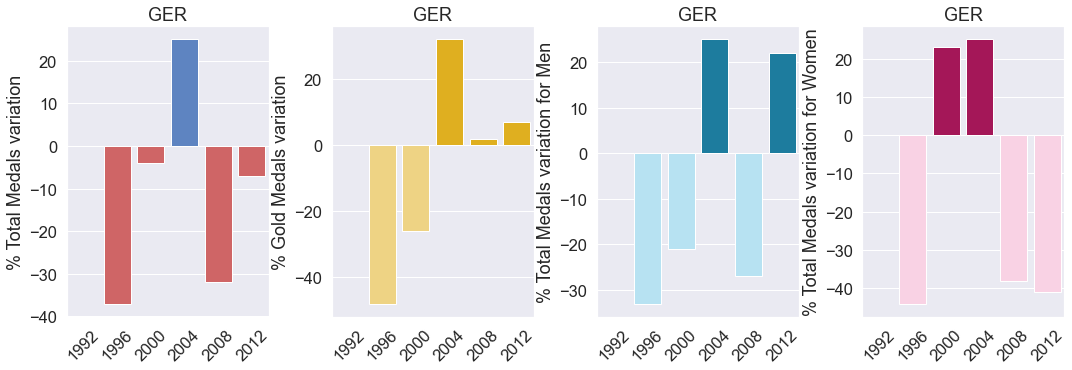

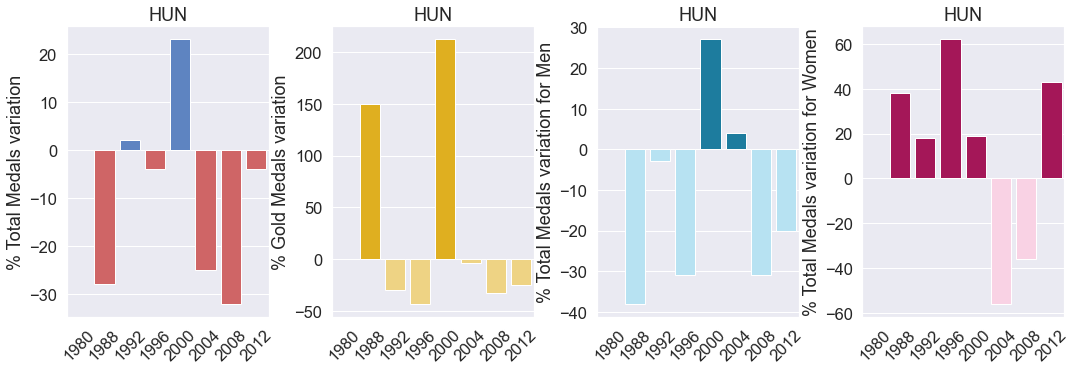

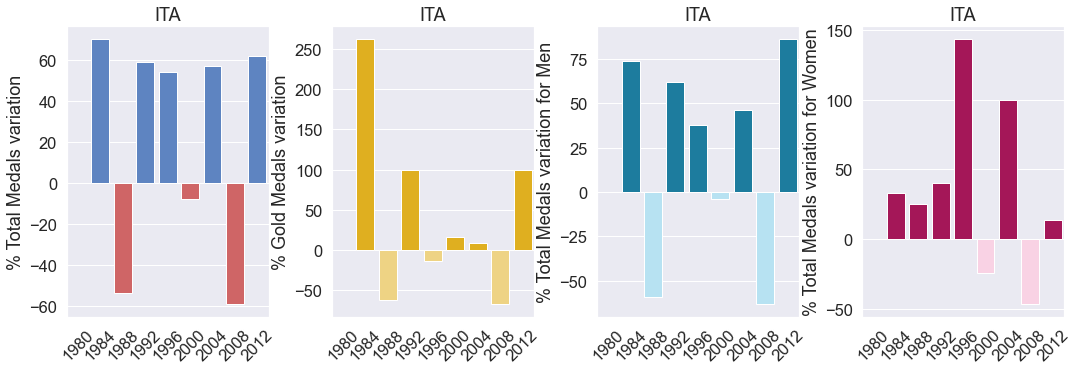

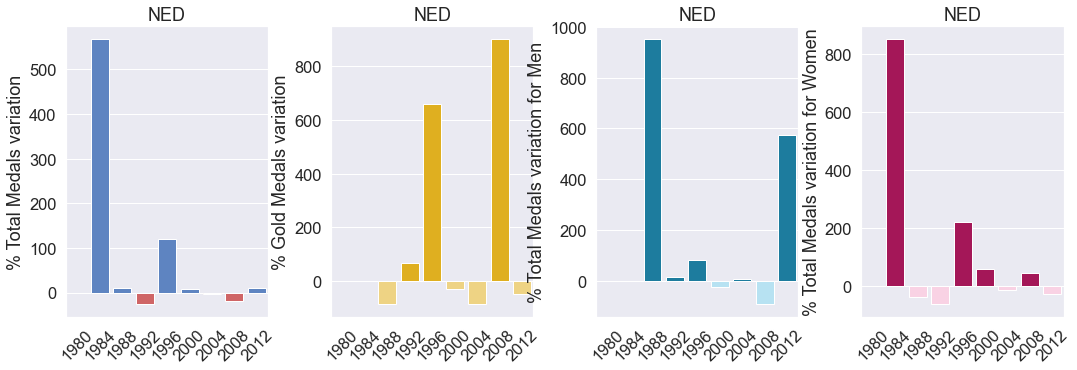

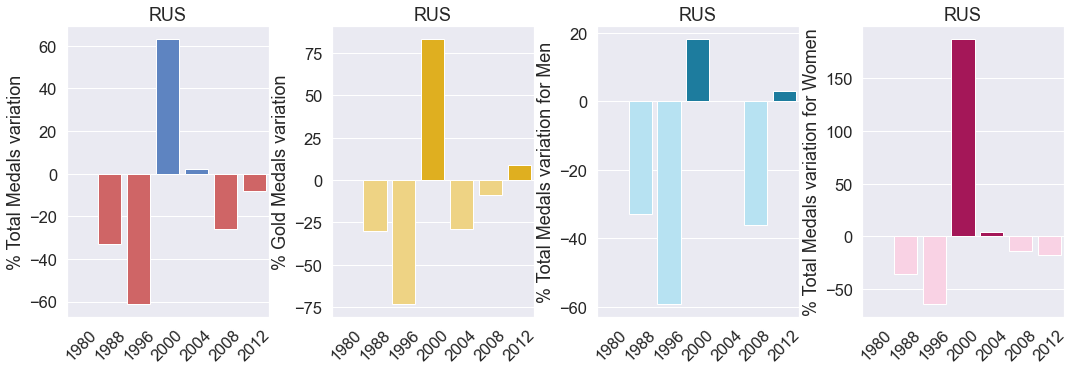

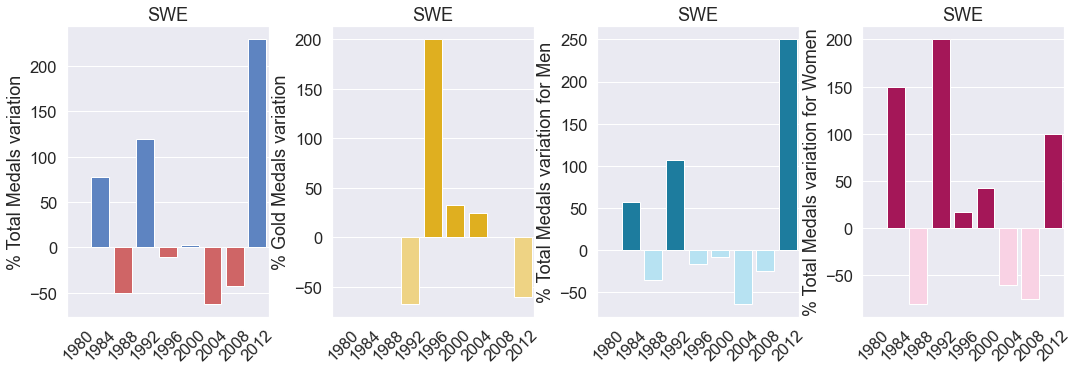

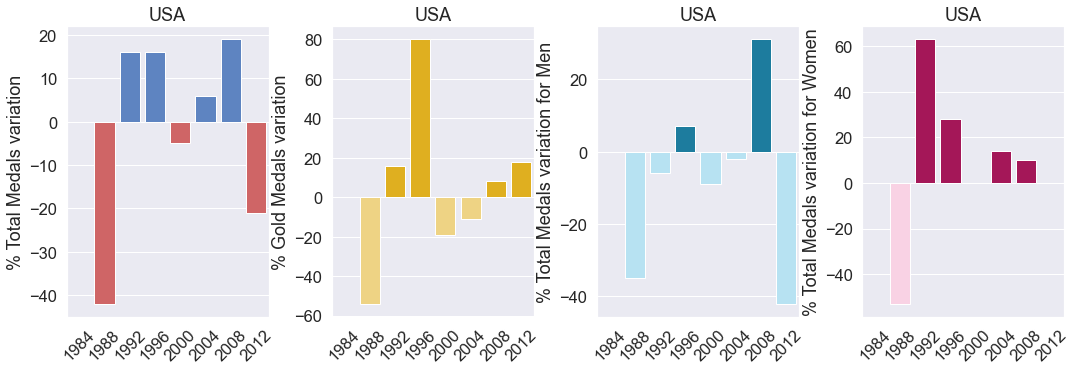

In [24]:
for c in np.sort(df_top10_80s.Country.unique()):
    year_sub = df_top10_80s.groupby(['Country', 'Year']).agg({'Var_year':np.mean})
    year_sub_b = year_sub.loc[c]
    
    gold_sub = df_top10_80s.groupby(['Country', 'Year']).agg({'Var_gold':np.mean})
    gold_sub_b = gold_sub.loc[c]
    
    men_sub = df_top10_80s.groupby(['Country', 'Year']).agg({'Var_men':np.mean})
    men_sub_b = men_sub.loc[c]
    
    women_sub = df_top10_80s.groupby(['Country', 'Year']).agg({'Var_women':np.mean})
    women_sub_b = women_sub.loc[c]
        
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    plt.tight_layout()

    sns.barplot(ax=axes[0], data=year_sub_b, x=year_sub_b.index, y='Var_year', ci=None, 
                palette=['#4e80d1' if  v >= 0 else '#e15355' for v in year_sub_b.Var_year])
    sns.barplot(ax=axes[1], data=gold_sub_b, x=gold_sub_b.index, y='Var_gold', ci=None,
                palette=['#ffbf00' if  v >= 0 else '#ffdc73' for v in gold_sub_b.Var_gold])
    sns.barplot(ax=axes[2], data=men_sub_b, x=men_sub_b.index, y='Var_men', ci=None,
                palette=['#0786b4' if  v >= 0 else '#ade7fc' for v in men_sub_b.Var_men])
    sns.barplot(ax=axes[3], data=women_sub_b, x=women_sub_b.index, y='Var_women', ci=None,
                palette=['#bb0056' if  v >= 0 else '#ffcce3' for v in women_sub_b.Var_women])
    
    axes[0].set(xlabel='', ylabel='% Total Medals variation', title=c)
    axes[1].set(xlabel='', ylabel='% Gold Medals variation', title=c)
    axes[2].set(xlabel='', ylabel='% Total Medals variation for Men', title=c)
    axes[3].set(xlabel='', ylabel='% Total Medals variation for Women', title=c)
    
    axes[0].tick_params(axis='x', labelrotation=45)
    axes[1].tick_params(axis='x', labelrotation=45)
    axes[2].tick_params(axis='x', labelrotation=45)
    axes[3].tick_params(axis='x', labelrotation=45)

In [25]:
df_top10_80s.to_csv('C:/Users/raflg/Downloads/Databases/summer_arranged2.csv')